In [2]:
# Define environment variables for Spark and Hadoop
import os

os.environ['HADOOP_CONF_DIR'] = r'C:\\Hadoop\\etc\\hadoop'
os.environ['HADOOP_HOME'] = r'C:\\Hadoop'
os.environ['PYSPARK_PYTHON'] = r'C:\\Users\\Hieu\\AppData\\Local\\Microsoft\\WindowsApps\\python3.10.exe'
os.environ['JAVA_HOME'] = r'C:\\Program Files\\Microsoft\\jdk-11.0.29.7-hotspot'
os.environ['SPARK_HOME'] = r'C:\\Spark'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
os.environ['SPARK_VERSION'] = '3.5.7'

In [3]:
# Initialize findspark
import findspark
findspark.init("C:\\Spark")

In [4]:
# Initialize Spark Session
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .appName("BDA501_Notebook_Analysis")
    .master("yarn")
    .config("spark.executor.memory", "4g")
    .config("spark.hadoop.mapreduce.fileoutputcommitter.algorithm.version", "1")
    .getOrCreate()
)

sc = spark.sparkContext

print("Spark Session initilized!")
print(spark.version)
print(sc.uiWebUrl)

Spark Session initilized!
3.5.7
http://192.168.1.2:4040


In [5]:
# Define const variables
HDFS_PATH_BASE = "hdfs://localhost:19000/user/bda501/brain_tumor/"
PROCESSED_PATH = HDFS_PATH_BASE + "processed/"

In [6]:
from pyspark.sql.functions import col

final_df = spark.read.parquet(PROCESSED_PATH)

label_counts = final_df.groupBy("label").count()
label_counts.show()

total_count = final_df.count()
print(f"Total number of records: {total_count}")

+----------+-----+
|     label|count|
+----------+-----+
|    glioma| 1321|
|meningioma| 1339|
|   notumor| 1595|
| pituitary| 1457|
+----------+-----+

Total number of records: 5712


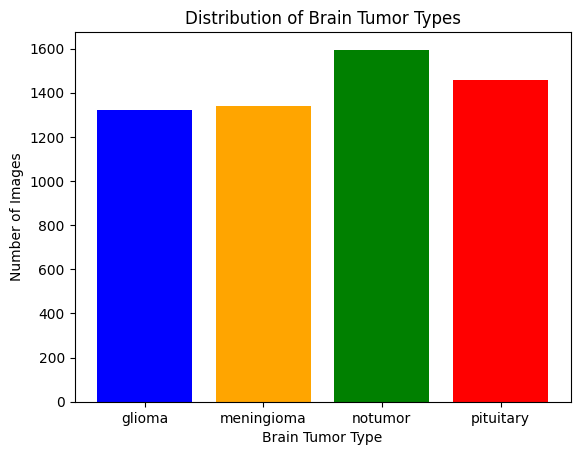

In [7]:
# Show chart analysis
import matplotlib.pyplot as plt
labels = [row['label'] for row in label_counts.collect()]
counts = [row['count'] for row in label_counts.collect()]
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Brain Tumor Type')
plt.ylabel('Number of Images')
plt.title('Distribution of Brain Tumor Types')
plt.show()

In [8]:
# Stop spark
spark.stop()